voir pour utiliser la fonction make_pipeline
https://www.geeksforgeeks.org/make_pipeline-function-in-sklearn/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_preprocess = pd.read_csv('../data/predictive_maintenance_preprocess.csv')

Extract the name of variable of 'Target'

In [3]:
name_target_col = list(filter(lambda ligne: 'Target' in ligne, df_preprocess.columns))

Separation of explanatory variables and variables to identify

In [4]:
x = df_preprocess.drop(columns=name_target_col)
y = df_preprocess[name_target_col]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [6]:
num_features = x.shape[1]
num_target = y.shape[1]

In [8]:
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import Sequential, Input
from tensorflow.python.keras.losses import CategoricalCrossentropy
from tensorflow.python.keras.optimizer_v2.adam import Adam


In [41]:


from tensorflow.python import keras

keras.backend.clear_session()

In [42]:
from tensorflow.python.keras.regularizers import l2, l1
from tensorflow.python.keras.metrics import Accuracy, SparseCategoricalAccuracy, CategoricalAccuracy, AUC, \
    PrecisionAtRecall

EPOCH=20

model = Sequential()
model.add(Input(num_features))
model.add(Dense(units=1024, activation='relu', kernel_regularizer=l1()))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=num_target, activation='softmax'))

#model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
model.compile(loss=CategoricalCrossentropy(),optimizer=Adam(5e-4), metrics=[PrecisionAtRecall(recall=0.8)])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              12288     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [43]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=EPOCH)

Epoch 1/20
250/250 [==============================] - 3s 8ms/step - loss: 3.2576 - precision_at_recall: 0.9432 - val_loss: 0.4183 - val_precision_at_recall: 0.9686
Epoch 2/20
250/250 [==============================] - 1s 6ms/step - loss: 0.7656 - precision_at_recall: 0.9583 - val_loss: 1.4886 - val_precision_at_recall: 0.9686
Epoch 3/20
250/250 [==============================] - 2s 6ms/step - loss: 0.4847 - precision_at_recall: 0.9634 - val_loss: 0.3990 - val_precision_at_recall: 0.9685
Epoch 4/20
250/250 [==============================] - 2s 7ms/step - loss: 0.4087 - precision_at_recall: 0.9660 - val_loss: 0.3895 - val_precision_at_recall: 0.9685
Epoch 5/20
250/250 [==============================] - 2s 8ms/step - loss: 0.4084 - precision_at_recall: 0.9657 - val_loss: 0.3849 - val_precision_at_recall: 0.9685
Epoch 6/20
250/250 [==============================] - 2s 8ms/step - loss: 0.3724 - precision_at_recall: 0.9658 - val_loss: 0.3495 - val_precision_at_recall: 0.9686
Epoch 7/20
250/2

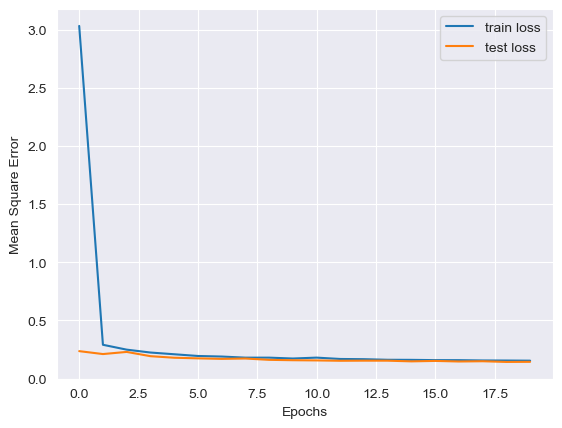

In [35]:
plt.plot(np.arange(EPOCH), history.history['loss'], label='train loss')
plt.plot(np.arange(EPOCH), history.history['val_loss'], label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.legend()
plt.show()

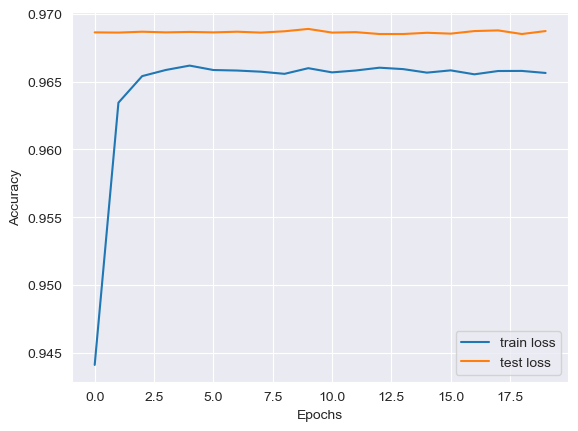

In [36]:
plt.plot(np.arange(EPOCH), history.history['precision_at_recall'], label='train loss')
plt.plot(np.arange(EPOCH), history.history['val_precision_at_recall'], label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()